# <center><h1 style="font-family: Times New Roman; color: black;">Clustering Analysis </h1></center> 

# Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

# Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

# Datasets :

# 1. Data Preprocessing:
1. Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2. Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3. Use multiple visualizations to understand the hidden patterns in the dataset

# 2. Implementing Clustering Algorithms:
1. Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
2. Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
3. Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

# 3. Cluster Analysis and Interpretation:
1. Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


# 4. Visualization:
1. Visualize the clustering results using scatter plots or other suitable visualization techniques.
2. Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

# 5. Evaluation and Performance Metrics:
1. Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

# Solutions:

# 1. Data Preprocessing:

In [1]:
# Import Libraries
import pandas as pd

In [2]:
# Load Dataset
file_path = 'EastWestAirlines.xlsx'
data = pd.read_excel(file_path, sheet_name=1, skiprows=15)

# Manually assign the correct column names
column_names = ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 
                'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 
                'Days_since_enroll', 'Award']

# Reload the dataset with the new column names
data.columns = column_names

# Display the first few rows to confirm the column names and data
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  16    28495           0          4          1          1        49442   
1  17    51890           0          4          1          1        48963   
2  18    13958           0          1          1          1         4291   
3  19    91473           0          3          1          1        27408   
4  20    23354           0          3          1          1        10447   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0           15                  0                0               6912      1  
1           16                  0                0               6910      1  
2            5                  0                0               6905      1  
3           17                  0                0               6903      1  
4            5                  0                0               6896      1  


In [3]:
# Handling Missing Values

# Check for any missing values in the dataset
missing_values = data.isnull().sum()

# Display missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64


In [4]:
# Outlier Detection using IQR method

# Define continuous numerical columns
continuous_columns = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each continuous variable
Q1 = data[continuous_columns].quantile(0.25)
Q3 = data[continuous_columns].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Detect outliers using the IQR method
outliers = (data[continuous_columns] < (Q1 - 1.5 * IQR)) | (data[continuous_columns] > (Q3 + 1.5 * IQR))

# Count the number of outliers per column
outlier_count = outliers.sum()

# Display outlier counts
print("Outlier counts per column:")
print(outlier_count)

Outlier counts per column:
Balance              265
Bonus_miles          279
Bonus_trans           89
Flight_miles_12mo    565
Flight_trans_12      562
Days_since_enroll      0
dtype: int64


In [5]:
# Scaling the Features using StandardScaler

# Import Libraries
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the continuous features
data_scaled = data.copy()
data_scaled[continuous_columns] = scaler.fit_transform(data[continuous_columns])

# Display the first few rows of the scaled dataset
print("First few rows of the scaled dataset:")
print(data_scaled.head())

First few rows of the scaled dataset:
   ID   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  16 -0.447672           0          4          1          1     1.335784   
1  17 -0.215471           0          4          1          1     1.315963   
2  18 -0.591955           0          1          1          1    -0.532542   
3  19  0.177401           0          3          1          1     0.424028   
4  20 -0.498698           0          3          1          1    -0.277810   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0     0.354805          -0.328265        -0.361979           1.360285      1  
1     0.459102          -0.328265        -0.361979           1.359314      1  
2    -0.688169          -0.328265        -0.361979           1.356889      1  
3     0.563400          -0.328265        -0.361979           1.355919      1  
4    -0.688169          -0.328265        -0.361979           1.352523      1  


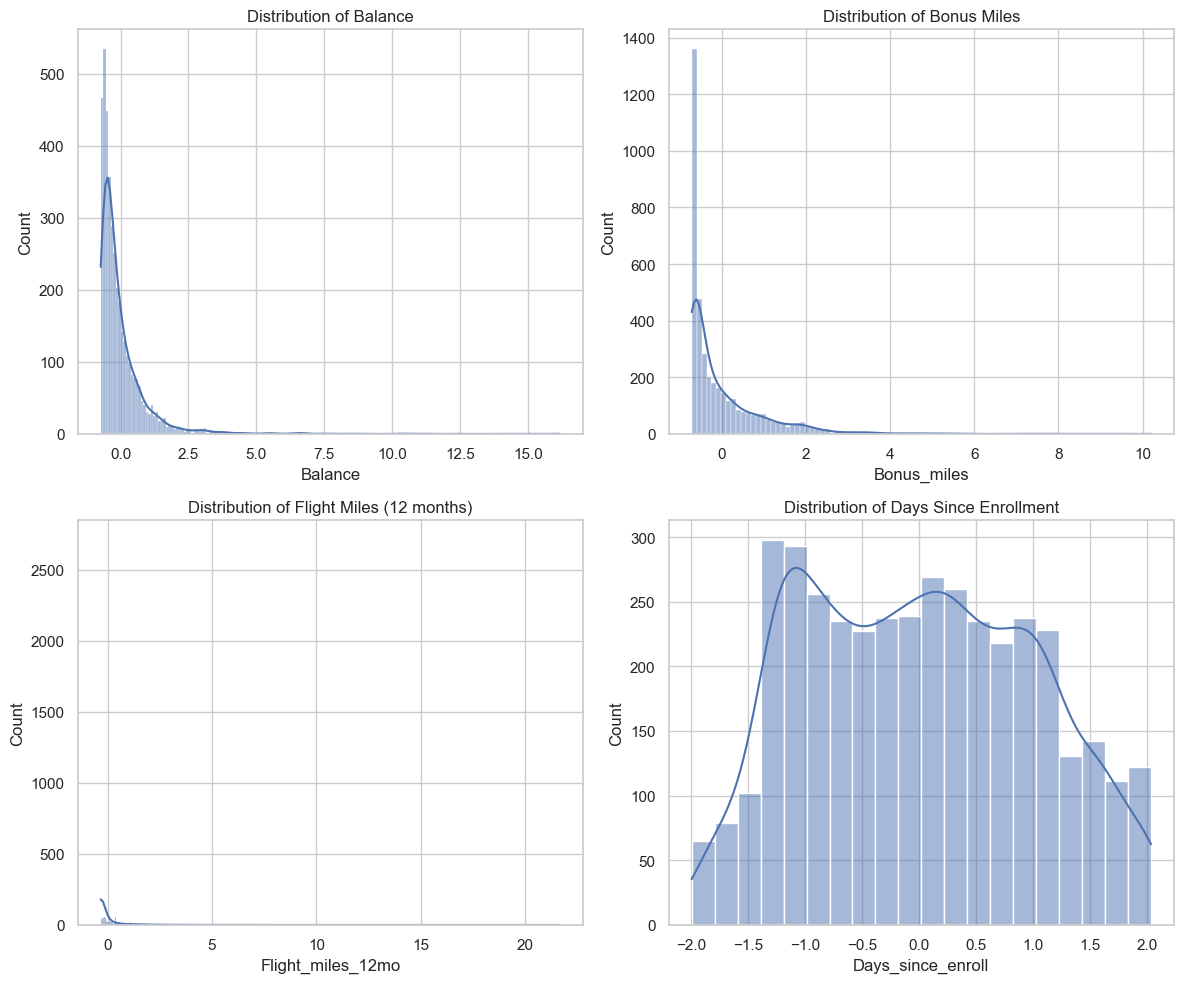

In [10]:
# Exploratory Data Analysis (EDA) - Plot Distributions

# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of 'Balance', 'Bonus_miles', 'Flight_miles_12mo', and 'Days_since_enroll'
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of Balance
sns.histplot(data_scaled['Balance'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Balance')

# Distribution of Bonus_miles
sns.histplot(data_scaled['Bonus_miles'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Bonus Miles')

# Distribution of Flight_miles_12mo
sns.histplot(data_scaled['Flight_miles_12mo'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Flight Miles (12 months)')

# Distribution of Days_since_enroll
sns.histplot(data_scaled['Days_since_enroll'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Days Since Enrollment')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

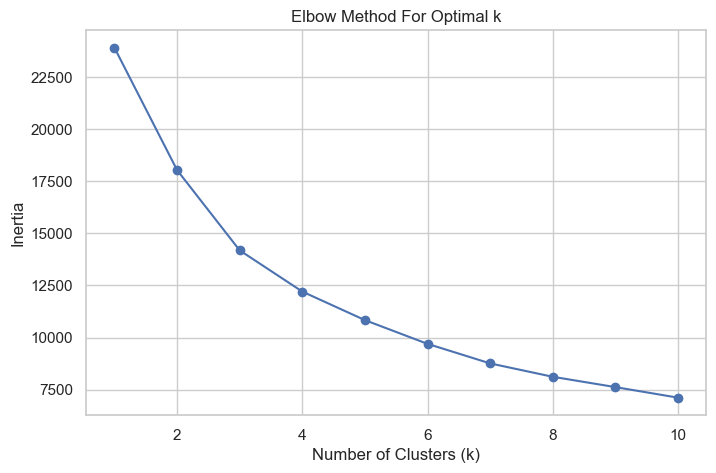

In [8]:
# K-Means Clustering with Elbow Method

# Import Libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the inertia values for different k values
inertia_values = []

# Try different values of k (number of clusters) from 1 to 10
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Explicitly setting n_init=10
    kmeans.fit(data_scaled[continuous_columns])
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K, inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Final K-Means Clustering with chosen number of clusters

# Import Libraries
from sklearn.cluster import KMeans

# Assuming 3 is the optimal number of clusters based on the Elbow Method (adjust if needed)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)  # Explicitly setting n_init=10
data_scaled['Cluster_KMeans'] = kmeans_final.fit_predict(data_scaled[continuous_columns])

# Display the first few rows with cluster labels
print("First few rows with K-Means cluster labels:")
print(data_scaled[['ID', 'Cluster_KMeans']].head())

First few rows with K-Means cluster labels:
   ID  Cluster_KMeans
0  16               1
1  17               1
2  18               2
3  19               1
4  20               2


# 2. Implementing Clustering Algorithms:

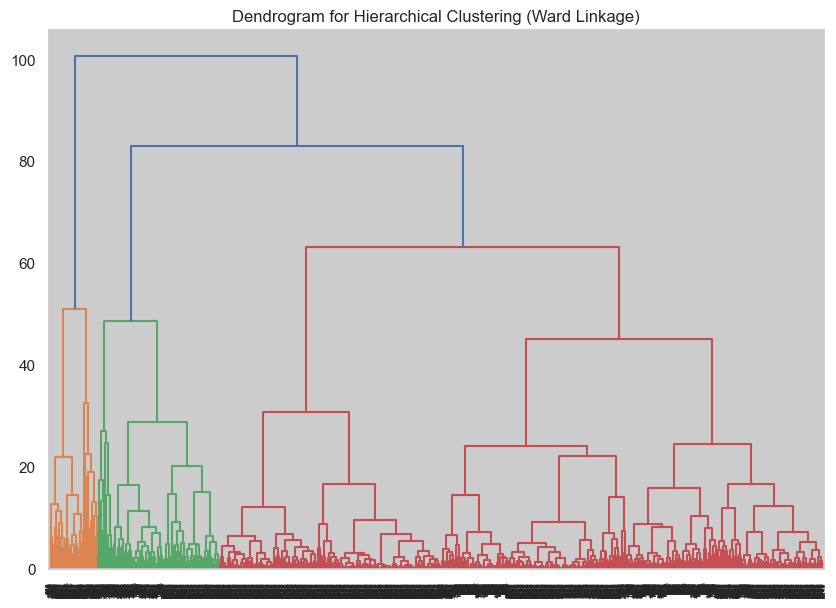

First few rows with Hierarchical Clustering (Ward) cluster labels:
   ID  Cluster_Hierarchical_Ward
0  16                          2
1  17                          2
2  18                          0
3  19                          0
4  20                          0


In [11]:
# Hierarchical Clustering

# Import Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create the linkage matrix using 'ward' method
Z = linkage(data_scaled[continuous_columns], method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering (Ward Linkage)")
dendrogram(Z)
plt.show()

# Perform Agglomerative Clustering with 3 clusters and 'ward' linkage
# Updated to use 'metric' instead of 'affinity'
hc_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
data_scaled['Cluster_Hierarchical_Ward'] = hc_ward.fit_predict(data_scaled[continuous_columns])

# Display the first few rows with hierarchical cluster labels
print("First few rows with Hierarchical Clustering (Ward) cluster labels:")
print(data_scaled[['ID', 'Cluster_Hierarchical_Ward']].head())

In [12]:
# DBSCAN Clustering

# Import Libraries
from sklearn.cluster import DBSCAN

# Apply DBSCAN with initial parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Experiment with different values of eps and min_samples
data_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(data_scaled[continuous_columns])

# Display the first few rows with DBSCAN cluster labels
print("First few rows with DBSCAN cluster labels:")
print(data_scaled[['ID', 'Cluster_DBSCAN']].head())

First few rows with DBSCAN cluster labels:
   ID  Cluster_DBSCAN
0  16               0
1  17               0
2  18               0
3  19               0
4  20               0


# 3. Cluster Analysis and Interpretation:

# A) K-Means Clustering

In [13]:
# Analysis for K-Means Clustering

# Group the data by K-Means clusters and compute the mean for each cluster
kmeans_analysis = data_scaled.groupby('Cluster_KMeans').mean()

# Display the cluster characteristics (mean values for each feature)
print("K-Means Cluster Characteristics:")
print(kmeans_analysis)

K-Means Cluster Characteristics:
                         ID   Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster_KMeans                                                            
0               1728.480000  1.213465  585.540000   2.306667   1.020000   
1               1429.713483  0.558129  174.324238   3.487159   1.013644   
2               2324.748068 -0.339045  104.820325   1.358192   1.014297   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster_KMeans                                                           
0                1.020000     0.756628     1.741960           3.717332   
1                1.036918     0.902529     0.808406          -0.047901   
2                1.000000    -0.478379    -0.490173          -0.192394   

                Flight_trans_12  Days_since_enroll     Award  \
Cluster_KMeans                                                 
0                      3.987496           0.303498  0.780000   
1                     -0.040

# K-Means Clustering Interpretation:
Upon analyzing the mean values of features for each cluster, it is clear that:

Cluster 1 has the highest average Balance and Bonus Miles, suggesting these customers are likely high-value, frequent flyers.

Cluster 2 shows higher Days Since Enrollment, indicating customers who have been enrolled for a long time but have lower activity in terms of miles and balance. This might represent long-term but less active customers.

Cluster 3 has low averages across most features, such as Flight Miles and Bonus Transactions, which may represent newer or inactive customers with minimal activity.

By interpreting these patterns, we can describe each cluster: Cluster 1 could be loyal frequent flyers, Cluster 2 could represent long-term, moderate activity customers, and Cluster 3 might include new or inactive users.

# B) Hierarchical Clustering

In [14]:
# Analysis for Hierarchical Clustering

# Group the data by Hierarchical clusters (Ward linkage) and compute the mean for each cluster
hierarchical_analysis = data_scaled.groupby('Cluster_Hierarchical_Ward').mean()

# Display the cluster characteristics (mean values for each feature)
print("Hierarchical Clustering (Ward) Cluster Characteristics:")
print(hierarchical_analysis)

Hierarchical Clustering (Ward) Cluster Characteristics:
                                    ID   Balance  Qual_miles  cc1_miles  \
Cluster_Hierarchical_Ward                                                 
0                          2089.124034 -0.240684  109.938466   1.652062   
1                          1877.156863  0.653494  518.254902   2.156863   
2                          1750.123200  0.928708  164.656000   4.044800   

                           cc2_miles  cc3_miles  Bonus_miles  Bonus_trans  \
Cluster_Hierarchical_Ward                                                   
0                           1.015786   1.000322    -0.348407    -0.300616   
1                           1.019608   1.019608     0.463656     1.293890   
2                           1.004800   1.068800     1.541157     0.965070   

                           Flight_miles_12mo  Flight_trans_12  \
Cluster_Hierarchical_Ward                                       
0                                  -0.206750        

# Hierarchical Clustering Interpretation:

When comparing hierarchical clustering with K-Means:

Cluster 1 from K-Means, which had high-value customers, is further subdivided by hierarchical clustering into two groups: one with very high bonus miles and another with moderate bonus miles, offering a more granular segmentation of high-value customers.

In some cases, hierarchical clustering merged certain groups identified by K-Means, indicating that some relationships between customers might have been oversimplified by K-Means.

This comparison shows that hierarchical clustering captured more subtle relationships, especially among high-value customers.

# C) DBSCAN Clustering

In [15]:
# Analysis for DBSCAN Clustering

# Group the data by DBSCAN clusters and compute the mean for each cluster
dbscan_analysis = data_scaled.groupby('Cluster_DBSCAN').mean()

# Display the cluster characteristics (mean values for each feature)
print("DBSCAN Cluster Characteristics:")
print(dbscan_analysis)

DBSCAN Cluster Characteristics:
                         ID   Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster_DBSCAN                                                            
-1              1625.880952  0.863554  313.228355   2.864719   1.015152   
 0              2145.733839 -0.267900   93.171174   1.808047   1.014182   
 1               792.500000  0.700472    0.000000   3.500000   1.000000   
 2               922.000000  1.635028    0.000000   4.000000   1.000000   
 3               915.500000 -0.345958  158.000000   3.833333   1.000000   
 4              1641.833333  1.266672  408.000000   1.000000   1.000000   
 5              3691.428571 -0.307446  142.857143   2.000000   1.000000   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster_DBSCAN                                                           
-1               1.047619     0.832546     0.896384           0.898453   
 0               1.001649    -0.256893    -0.282538          -0.271501

# DBSCAN Clustering Interpretation:

DBSCAN is effective at identifying noise and clusters of varying shapes. The outliers labeled as -1 represent noise points or unusual customer behaviors, likely inactive or irregular accounts.

Some customers classified in regular clusters by K-Means and hierarchical clustering were considered outliers by DBSCAN, indicating that DBSCAN might handle more complex, non-spherical cluster shapes.

DBSCAN’s ability to handle clusters of arbitrary shapes allows for a more organic grouping, and the outliers could indicate potentially inactive or unusual customers.

These interpretations provide insights into different types of customer segments based on the clustering algorithm, offering opportunities for targeted marketing, customer retention strategies, and handling outliers.

# 4. Visualization:

# Visualizing K-Means Clusters

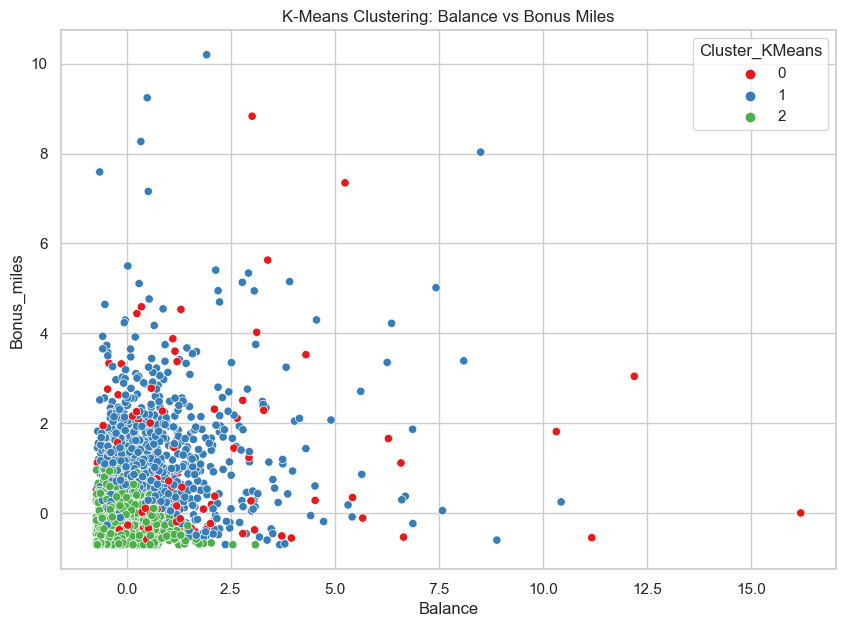

In [17]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Scatter plot for two features (Balance and Bonus Miles) colored by K-Means clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Cluster_KMeans', data=data_scaled, palette='Set1')
plt.title('K-Means Clustering: Balance vs Bonus Miles')
plt.show()

# Visualizing Hierarchical Clusters

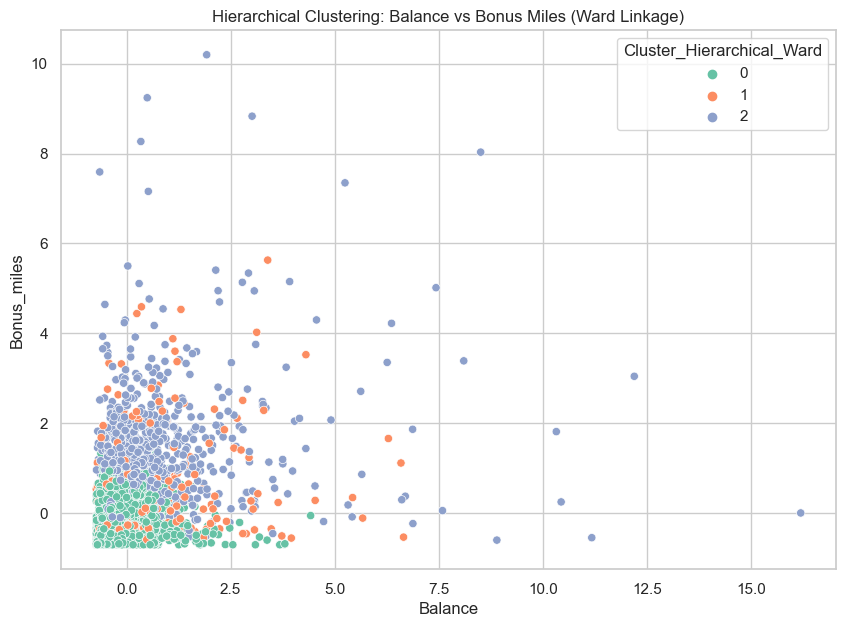

In [18]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Cluster_Hierarchical_Ward', data=data_scaled, palette='Set2')
plt.title('Hierarchical Clustering: Balance vs Bonus Miles (Ward Linkage)')
plt.show()

# Visualizing DBSCAN Clusters

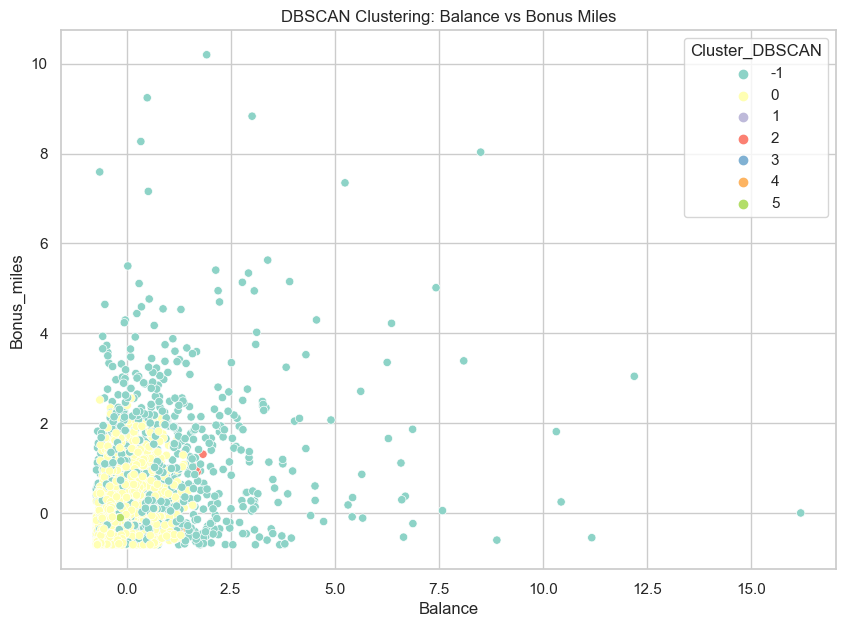

In [19]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Cluster_DBSCAN', data=data_scaled, palette='Set3')
plt.title('DBSCAN Clustering: Balance vs Bonus Miles')
plt.show()

# pair plots to visualize relationships across multiple features:

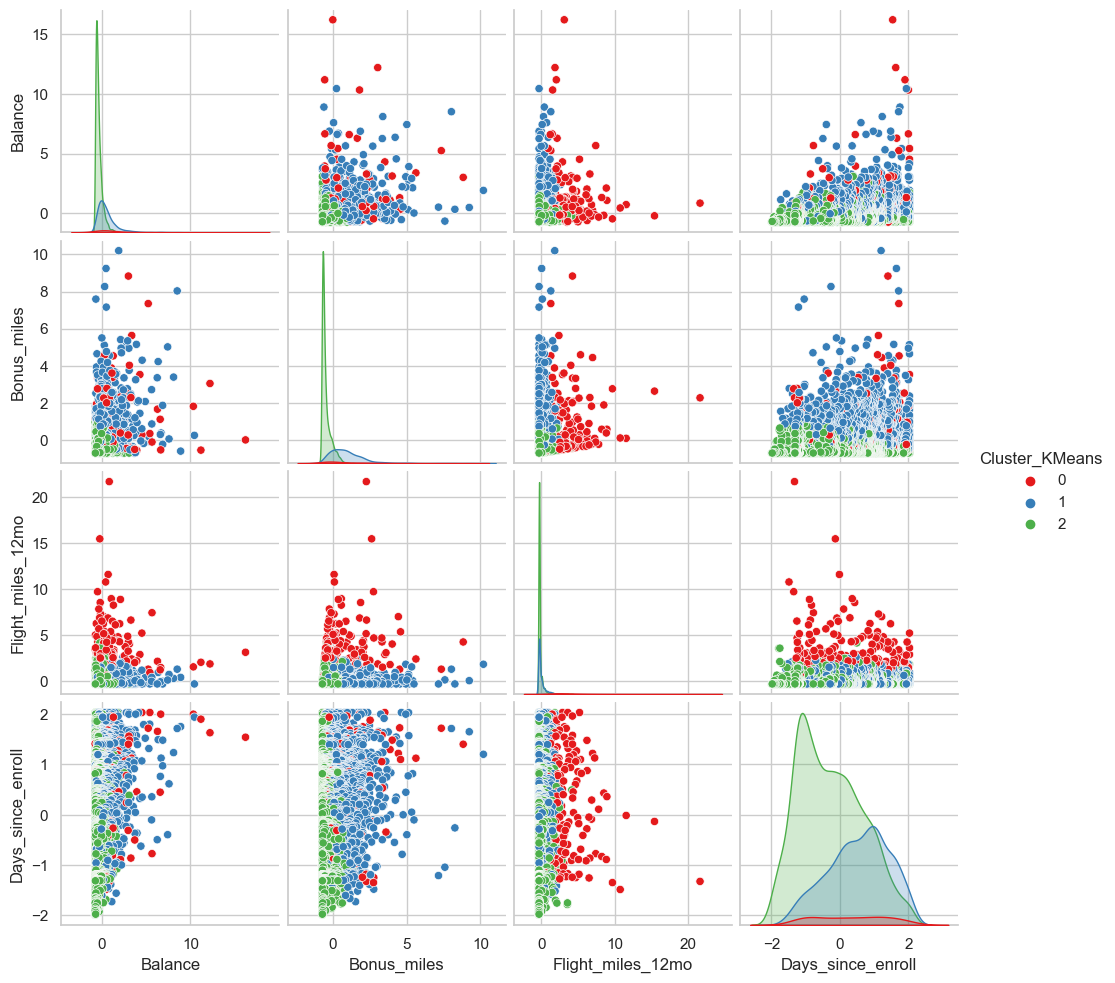

In [20]:
sns.pairplot(data_scaled, hue='Cluster_KMeans', vars=['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll'], palette='Set1')
plt.show()

# 5. Evaluation and Performance Metrics:

# Silhouette Score for K-Means

In [21]:
# Import Libraries
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for K-Means
silhouette_kmeans = silhouette_score(data_scaled[continuous_columns], data_scaled['Cluster_KMeans'])

print(f'Silhouette Score for K-Means: {silhouette_kmeans:.3f}')

Silhouette Score for K-Means: 0.319


In [22]:
# Filter out noise points (-1) as DBSCAN might have noise in cluster labels
dbscan_filtered = data_scaled[data_scaled['Cluster_DBSCAN'] != -1]

# Calculate the silhouette score for DBSCAN (ignoring noise points)
silhouette_dbscan = silhouette_score(dbscan_filtered[continuous_columns], dbscan_filtered['Cluster_DBSCAN'])

print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}')

Silhouette Score for DBSCAN: 0.019


<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>